***Course : IE-406 Machine Learning***

***Group: 16***

***Group Members:***

***Ravi Patel - 201801046***

***Ayan Khokhar - 201801057***

***Prakhar Maheshwari - 201801432***

***Jaydeep Machhi - 201801452***

***Aakash Panchal - 201801459***



In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [199]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [200]:
print(df.shape)

gender = {'Male': 0,'Female': 1}
df['Gender'] = [gender[item] for item in df['Gender']]

x = df[['User ID', 'Gender', 'Age', 'EstimatedSalary']]

print(x)
y = df['Purchased']

(400, 5)
      User ID  Gender  Age  EstimatedSalary
0    15624510       0   19            19000
1    15810944       0   35            20000
2    15668575       1   26            43000
3    15603246       1   27            57000
4    15804002       0   19            76000
..        ...     ...  ...              ...
395  15691863       1   46            41000
396  15706071       0   51            23000
397  15654296       1   50            20000
398  15755018       0   36            33000
399  15594041       1   49            36000

[400 rows x 4 columns]


In [201]:
scaler = MinMaxScaler()
dropped_df = df.drop(['User ID'], axis = 1)
column_names = dropped_df.columns


In [202]:
scaled_df = scaler.fit_transform(dropped_df)
scaled_df = pd.DataFrame(scaled_df, columns= column_names)
x = scaled_df[[ 'Gender', 'Age', 'EstimatedSalary']].values
y = scaled_df['Purchased'].values
print(scaled_df.head())

   Gender       Age  EstimatedSalary  Purchased
0     0.0  0.023810         0.029630        0.0
1     0.0  0.404762         0.037037        0.0
2     1.0  0.190476         0.207407        0.0
3     1.0  0.214286         0.311111        0.0
4     0.0  0.023810         0.451852        0.0


In [203]:


class MyLogisticRegression:
    def __init__(self, alpha=0.01, iterations=100000, fit_intercept=True):
        self.alpha = alpha
        self.iterations = iterations 
        self.fit_intercept = fit_intercept  
        # self.verbose = verbose  

    def _conc_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  
        return np.concatenate((intercept, X), axis=1) 
    def _logistic(self, z):

        return 1 / (1 + np.exp(-z))

    def _hypothesis(self, h, y):

        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
 

        if self.fit_intercept:
            X = self._conc_intercept(X) 

        self._weights = np.zeros(X.shape[1]) 
        for i in range(self.iterations):  
            z = np.dot(X, self._weights) 
            h = self._logistic(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self._weights -= self.alpha * gradient
            
            # if (self.verbose == True and i % 10000 == 0):
            #     z = np.dot(X, self._weights)
            #     h = self._logistic(z)
            #     print(f'loss: {self._hypothesis(h, y)} \t')

    # def predict_prob(self, X):  
        
    
    def predict(self, X, threshold = 0.5):
        if self.fit_intercept:
            X = self._conc_intercept(X)

        return self._logistic(np.dot(X, self._weights)) >= threshold

Text(0.5, 0.92, 'Scatter plot of Features')

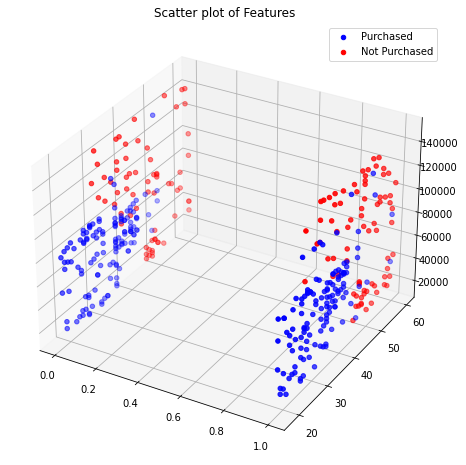

In [204]:
plt.figure(figsize = (8,8))
ax = plt.axes(projection ='3d')

df0 = df[df.Purchased == 0]
df1 = df[df.Purchased == 1]

ax.scatter(df0['Gender'].values, df0['Age'].values,df0['EstimatedSalary'].values, c = 'blue')
ax.scatter(df1['Gender'].values, df1['Age'].values,df1['EstimatedSalary'].values, c = 'red')
plt.legend(['Purchased', 'Not Purchased'])
ax.set_title('Scatter plot of Features')

0.925


<AxesSubplot:>

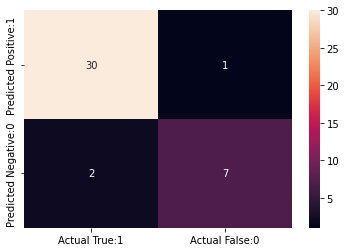

In [205]:
regressor = MyLogisticRegression()
X = x
# print(X,y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=4)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

confusion_mat = confusion_matrix(y_test, y_pred)

# print(y_predicted)
graph_cm_matrix = pd.DataFrame(confusion_mat, columns=['Actual True:1', 'Actual False:0'], 
                                 index=['Predicted Positive:1', 'Predicted Negative:0'])

sns.heatmap(graph_cm_matrix, annot=True, fmt='d')

In [206]:
# #Using scitkit-learn's implementation of Logistic Regression
# X = x

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.1, random_state=2)

# clf = LogisticRegression(random_state=10, n_jobs=1).fit(X_train, y_train)
# y_predicted = clf.predict(X_test)
# confusion_mat = confusion_matrix(y_test, y_predicted)

# # print(y_predicted)
# graph_cm_matrix = pd.DataFrame(confusion_mat, columns=['Actual True:1', 'Actual False:0'], 
#                                  index=['Predicted Positive:1', 'Predicted Negative:0'])

# sns.heatmap(graph_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [207]:
def calculate_classification_metrics(confusion_mat):
   TP= confusion_mat[0,0]
   FP = confusion_mat[0,1]
   FN = confusion_mat[1,0]
   TN = confusion_mat[1,1]
   accuracy = (TP + TN)/(TP + TN + FP + FN)
   precision = (TP)/(TP + FP)
   recall = (TP)/(TP + FN)
   F1 = (2 * precision * recall)/(precision + recall)
   print(f'Accuracy: {accuracy}')
   print(f'Precision: {precision}')
   print(f'Recall: {recall}')
   print(f'F1 Score: {F1}')

In [208]:
calculate_classification_metrics(confusion_mat)

Accuracy: 0.925
Precision: 0.967741935483871
Recall: 0.9375
F1 Score: 0.9523809523809523


***Question 2:You will work with a widely used Iris dataset. The Iris Dataset
contains four features (sepal length, sepal width, petal length, and petal width) of 50
samples of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Plot
features’ histogram. Compute pdf and compare it with histogram. perform the
exploratory data analysis by plotting the basic statistics like mean, median, min, and
max value of each feature (sepal and petal lengths and widths) for each of the three
classes (setosa, virginica, and versicolor).***

In [209]:
iris_df = pd.read_csv('./Iris.csv')
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [210]:
print(iris_df.shape)


(150, 6)


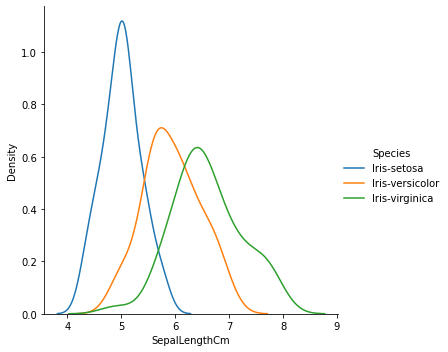

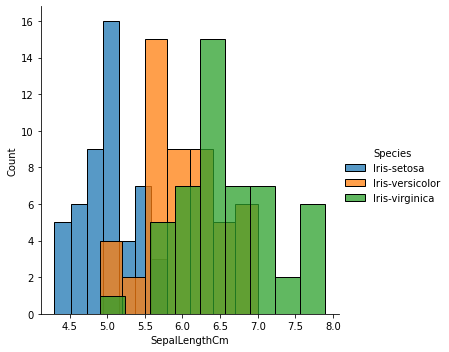

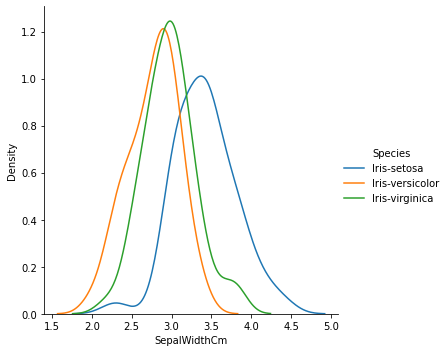

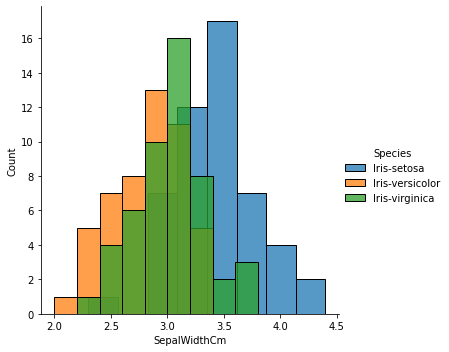

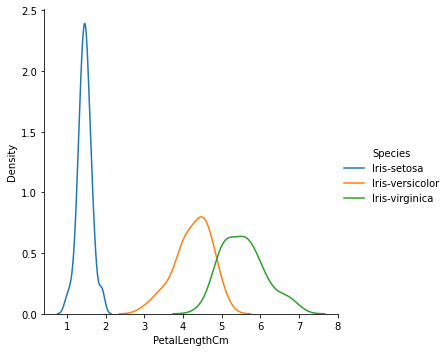

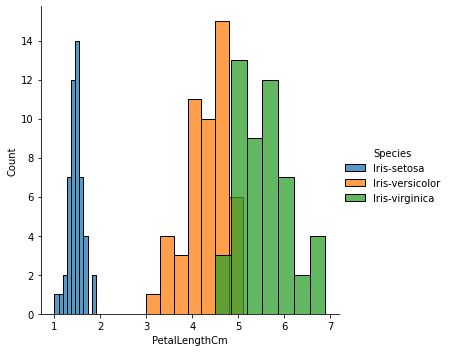

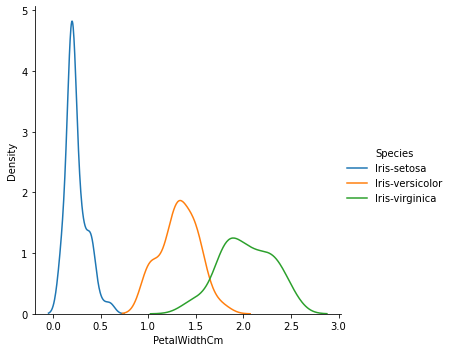

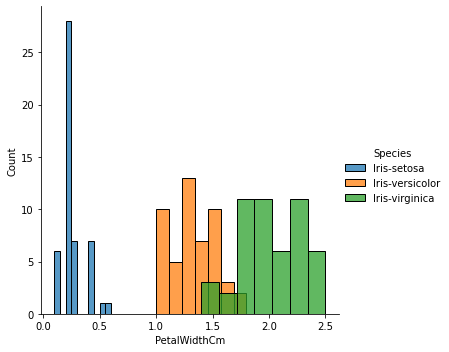

In [211]:

# sns.histplot(iris_df, x= 'SepalLengthCm', kde=True)
features = iris_df.columns

for i in range(1,5):
   grid = sns.FacetGrid(iris_df, hue='Species', height=5)
   grid1 = sns.FacetGrid(iris_df, hue='Species', height=5)
   grid.map(sns.kdeplot, features[i]).add_legend();
   grid1.map(sns.histplot, features[i]).add_legend();

In [212]:
species = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica' : 2}
iris_df['Species'] = [species[item] for item in iris_df['Species']]



[5.006, 5.936, 6.587999999999998]


Text(0.5, 1.0, 'Mean of PetalWidth')

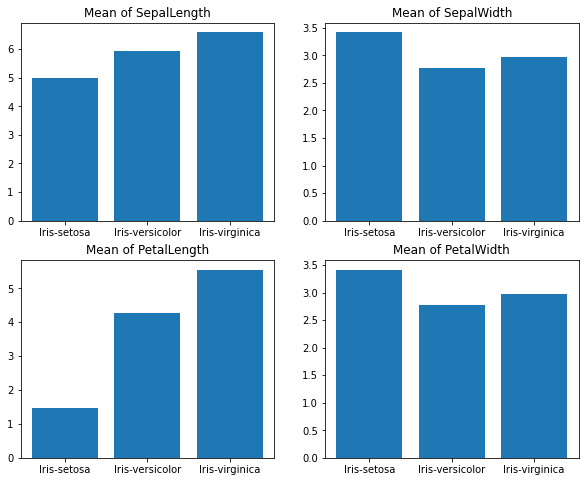

In [213]:
# print(iris_df.head())
df_dict = {g: d for g, d in iris_df.groupby('Species')}

SepalL = []
SepalW = []
PetalL = []
PetalW = []

x = list(species.keys())
for i in range(3):
   SepalL.append(df_dict[i].mean()['SepalLengthCm'])
   SepalW.append(df_dict[i].mean()['SepalWidthCm'])
   PetalL.append(df_dict[i].mean()['PetalLengthCm'])
   PetalW.append(df_dict[i].mean()['PetalWidthCm'])
   

print(SepalL)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.subplot(2,2,1)
plt.bar(x, SepalL)
plt.title('Mean of SepalLength')
plt.subplot(2,2,2)

plt.bar(x, SepalW)

plt.title('Mean of SepalWidth')
plt.subplot(2,2,3)

plt.bar(x, PetalL)

plt.title('Mean of PetalLength')
plt.subplot(2,2,4)
plt.bar(x, SepalW)

plt.title('Mean of PetalWidth')
   # (df_dict[i].median())
   # (df_dict[i].min())
   # (df_dict[i].max())




[5.0, 5.9, 6.5]


Text(0.5, 1.0, 'Median of PetalWidth')

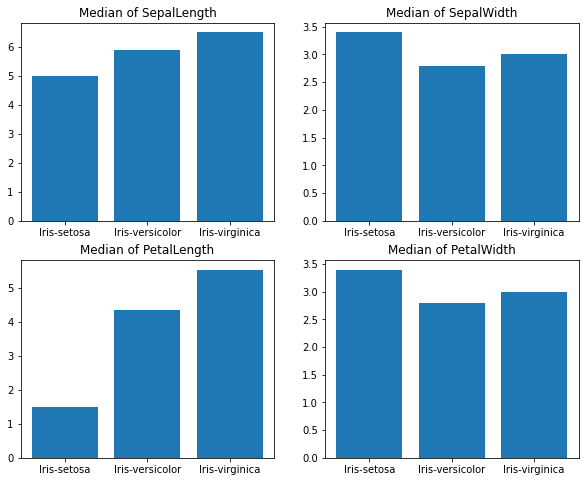

In [214]:

SepalL = []
SepalW = []
PetalL = []
PetalW = []
for i in range(3):
   SepalL.append(df_dict[i].median()['SepalLengthCm'])
   SepalW.append(df_dict[i].median()['SepalWidthCm'])
   PetalL.append(df_dict[i].median()['PetalLengthCm'])
   PetalW.append(df_dict[i].median()['PetalWidthCm'])

print(SepalL)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.subplot(2,2,1)
plt.bar(x, SepalL)
plt.title('Median of SepalLength')

plt.subplot(2,2,2)
plt.bar(x, SepalW)
plt.title('Median of SepalWidth')

plt.subplot(2,2,3)
plt.bar(x, PetalL)
plt.title('Median of PetalLength')

plt.subplot(2,2,4)
plt.bar(x, SepalW)
plt.title('Median of PetalWidth')


[4.3, 4.9, 4.9]


Text(0.5, 1.0, 'Minimum of PetalWidth')

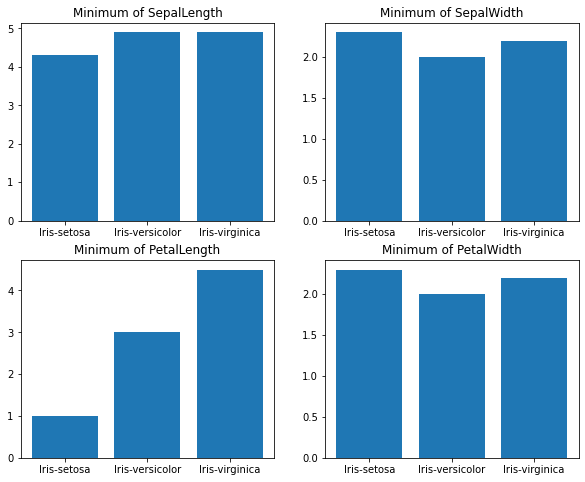

In [215]:

SepalL = []
SepalW = []
PetalL = []
PetalW = []
for i in range(3):
   SepalL.append(df_dict[i].min()['SepalLengthCm'])
   SepalW.append(df_dict[i].min()['SepalWidthCm'])
   PetalL.append(df_dict[i].min()['PetalLengthCm'])
   PetalW.append(df_dict[i].min()['PetalWidthCm'])

print(SepalL)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.subplot(2,2,1)
plt.bar(x, SepalL)
plt.title('Minimum of SepalLength')

plt.subplot(2,2,2)
plt.bar(x, SepalW)
plt.title('Minimum of SepalWidth')

plt.subplot(2,2,3)
plt.bar(x, PetalL)
plt.title('Minimum of PetalLength')

plt.subplot(2,2,4)
plt.bar(x, SepalW)
plt.title('Minimum of PetalWidth')


[5.8, 7.0, 7.9]


Text(0.5, 1.0, 'Maximum of PetalWidth')

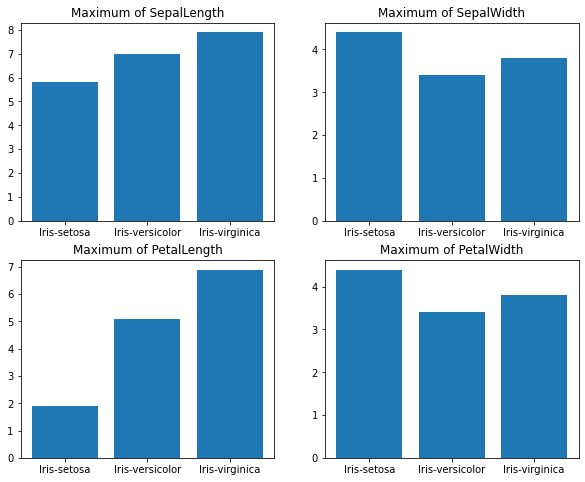

In [216]:

SepalL = []
SepalW = []
PetalL = []
PetalW = []
for i in range(3):
   SepalL.append(df_dict[i].max()['SepalLengthCm'])
   SepalW.append(df_dict[i].max()['SepalWidthCm'])
   PetalL.append(df_dict[i].max()['PetalLengthCm'])
   PetalW.append(df_dict[i].max()['PetalWidthCm'])

print(SepalL)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.subplot(2,2,1)
plt.bar(x, SepalL)
plt.title('Maximum of SepalLength')

plt.subplot(2,2,2)
plt.bar(x, SepalW)
plt.title('Maximum of SepalWidth')

plt.subplot(2,2,3)
plt.bar(x, PetalL)
plt.title('Maximum of PetalLength')

plt.subplot(2,2,4)
plt.bar(x, SepalW)
plt.title('Maximum of PetalWidth')


***Question 3: Visualize the data in the Iris Dataset by considering maximum combinations of two
features in a 2D plot. Use red, green, and blue colors for labeling the three classes: Iris
setosa, Iris virginica, and Iris versicolor, respectively. Comment on whether any two
classes among the three can be separated by a line? Report your observations for each
case.***

In [217]:
df = pd.read_csv('./Iris.csv')
# print(df.head())

species = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}
df['Species'] = [species[item] for item in df['Species'] ]
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
[0 1 2]


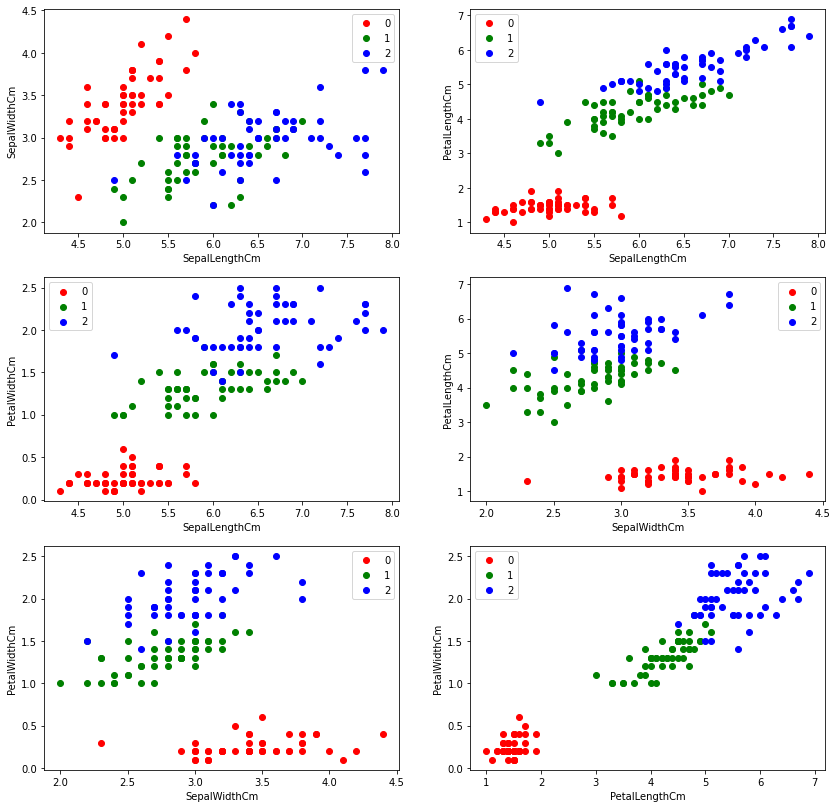

In [218]:
color_map = {0 : 'r', 1 : 'g', 2 : 'b'}
sps = df['Species'].unique()

marker_map = {0:'o', 1:'x', 2:'v'}

feature = df.columns[1:-1]
plt.figure(figsize = (14,14))
print(feature)
print(sps)

p = 1
for i in range(4):
   for j in range(i+1, 4):
     
         plt.subplot(3, 2, p)
         for k in sps:
            
            # plt.scatter(df[df['Species'] == k][feature[i]], df[df['Species'] == k][feature[j]], c = color_map[k], marker = marker_map[k], label = k)
            plt.scatter(df[df['Species'] == k][feature[i]], df[df['Species'] == k][feature[j]], c = color_map[k], label = k)
            plt.xlabel(feature[i])
            plt.ylabel(feature[j])
            plt.legend()
         
         p += 1

plt.show()



***Question 4: Perform logistic regression on IRIS Dataset and plot confusion matrix. Using confusion
matrix find accuracy, precision, F1 score and recall.***

In [219]:
iris_df = pd.read_csv('./Iris.csv')
print(iris_df.head())
species = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica' : 2}
iris_df['Species'] = [species[item] for item in iris_df['Species']]
dropped_df = iris_df.drop(['Id'], axis=1)
column_names = dropped_df.columns
scaled_df = scaler.fit_transform(dropped_df)
scaled_df = pd.DataFrame(scaled_df, columns =column_names)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [220]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


species = {0: 0,0.5: 1, 1 : 2}
scaled_df['Species'] = [species[item] for item in scaled_df['Species']]
X = scaled_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = scaled_df['Species']
print(X, y)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


<AxesSubplot:>

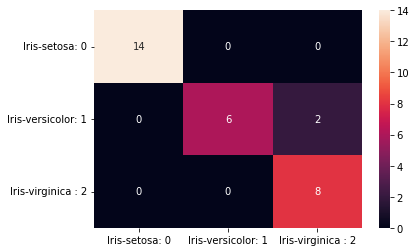

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

clf = LogisticRegression(random_state=10, n_jobs=1).fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_predicted)

# print(y_predicted)
graph_cm_matrix = pd.DataFrame(confusion_mat, columns=['Iris-setosa: 0','Iris-versicolor: 1', 'Iris-virginica : 2'], 
                                 index=['Iris-setosa: 0','Iris-versicolor: 1', 'Iris-virginica : 2'])

sns.heatmap(graph_cm_matrix, annot=True, fmt='d')

In [222]:
print(precision_recall_fscore_support(y_test, y_predicted, average='macro'))
print(precision_recall_fscore_support(y_test, y_predicted, average='micro'))
print(precision_recall_fscore_support(y_test, y_predicted, average='weighted'))

(0.9333333333333332, 0.9166666666666666, 0.9153439153439153, None)
(0.9333333333333333, 0.9333333333333333, 0.9333333333333333, None)
(0.9466666666666667, 0.9333333333333333, 0.9322751322751323, None)


***Question 5: Imbalanced dataset typically refers to a dataset where the classes are not represented
equally. Classification problems having multiple classes with imbalanced dataset
present a different challenge than a binary classification problem. The skewed
distribution makes the machine learning algorithms less effective, especially in
predicting minority class examples.In this question you will perform logistic regression for multiclass classification on the***

***20 News groups dataset. Since this dataset is a balanced one, you will perform the pre-
processing to create an imbalanced version of the dataset (by removing some news
articles from some groups). One example is given below. Perform multiclass
classification using logistic regression on both the balanced and the imbalanced version
of the dataset. Compare the performance in each case by obtaining the confusion matrix
and accuracy. Report you observations at the end.
You can refer to this article for a better understanding of multiclass classification using
logistic regression.***

In [223]:
# We use Iris Dataset first of all
iris_df = pd.read_csv('Iris.csv')
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [224]:
spec = iris_df['Species'].unique()
# print(spec)

iris_df0 = iris_df[iris_df['Species'] == spec[0]]
iris_df1 = iris_df[iris_df['Species'] == spec[1]]
iris_df2 = iris_df[iris_df['Species'] == spec[2]]

# Creating Imbalanced Dataset from the Given Iris dataset
subset_iris_df0 = iris_df0.sample(frac = 0.5)
subset_iris_df1 = iris_df1.sample(frac = 0.9)
subset_iris_df2 = iris_df2.sample(frac = 0.3)

In [225]:
new_subset = subset_iris_df0.append(subset_iris_df1).append(subset_iris_df2)
print(len(new_subset))

85


In [226]:
cols = new_subset.columns[1:-1]

species = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica' : 2}
new_subset['Species'] = [species[item] for item in new_subset['Species']]
X = new_subset[cols]
y = new_subset[new_subset.columns[-1]]


<AxesSubplot:>

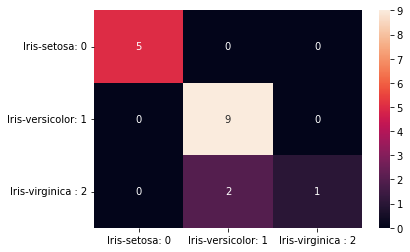

In [227]:

clf = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)
# print(pred_y)
conf_matrix = confusion_matrix(y_test, pred_y)
# print(conf_matrix)
graph_cm_matrix = pd.DataFrame(conf_matrix, columns=['Iris-setosa: 0','Iris-versicolor: 1', 'Iris-virginica : 2'], 
                                 index=['Iris-setosa: 0','Iris-versicolor: 1', 'Iris-virginica : 2'])

sns.heatmap(graph_cm_matrix, annot=True, fmt='d')

In [228]:
# calculate_classification_metrics(conf_matrix)

print(precision_recall_fscore_support(y_test, pred_y, average='macro'))

print(precision_recall_fscore_support(y_test, pred_y, average='micro'))

print(precision_recall_fscore_support(y_test, pred_y, average='weighted'))
# print(classification_report(y_test, pred_y))

(0.9393939393939394, 0.7777777777777778, 0.7999999999999999, None)
(0.8823529411764706, 0.8823529411764706, 0.8823529411764706, None)
(0.9037433155080213, 0.8823529411764706, 0.8588235294117647, None)
